In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('data/international_matches.csv')

In [3]:
df

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0


In [4]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_team_continent',
       'away_team_continent', 'home_team_fifa_rank', 'away_team_fifa_rank',
       'home_team_total_fifa_points', 'away_team_total_fifa_points',
       'home_team_score', 'away_team_score', 'tournament', 'city', 'country',
       'neutral_location', 'shoot_out', 'home_team_result',
       'home_team_goalkeeper_score', 'away_team_goalkeeper_score',
       'home_team_mean_defense_score', 'home_team_mean_offense_score',
       'home_team_mean_midfield_score', 'away_team_mean_defense_score',
       'away_team_mean_offense_score', 'away_team_mean_midfield_score'],
      dtype='object')

In [5]:
df.isnull().sum()

date                                 0
home_team                            0
away_team                            0
home_team_continent                  0
away_team_continent                  0
home_team_fifa_rank                  0
away_team_fifa_rank                  0
home_team_total_fifa_points          0
away_team_total_fifa_points          0
home_team_score                      0
away_team_score                      0
tournament                           0
city                                 0
country                              0
neutral_location                     0
shoot_out                            0
home_team_result                     0
home_team_goalkeeper_score       15542
away_team_goalkeeper_score       15826
home_team_mean_defense_score     16134
home_team_mean_offense_score     15411
home_team_mean_midfield_score    15759
away_team_mean_defense_score     16357
away_team_mean_offense_score     15609
away_team_mean_midfield_score    15942
dtype: int64

In [6]:
df['neutral_location'].replace([True,False],[1,0],inplace=True)

In [7]:
df['home_team_result'].replace(['Win', 'Draw', 'Lose'],[1,2,0],inplace=True)

In [8]:
df['shoot_out'].replace(['Yes','No'],[1,0],inplace=True)

# EDA

### Rank

In [9]:
fifa2022_teams = ['Ecuador', 'Senegal', 'Netherlands',
                  'England', 'IR Iran', 'USA', 'Wales',
                  'Argentina', 'Saudi Arabia', 'Mexico', 'Poland',
                  'France', 'Australia', 'Denmark', 'Tunisia',
                  'Spain', 'Costa Rica', 'Germany', 'Japan',
                  'Belgium', 'Canada', 'Morocco', 'Croatia',
                  'Brazil', 'Serbia', 'Switzerland', 'Cameroon',
                  'Portugal', 'Ghana', 'Uruguay', 'Korea Republic']

In [10]:
ranks=[]
for x in fifa2022_teams:
    rank_df=df[(df['home_team']==x)|(df['away_team']==x)].sort_values(by=['date','home_team_fifa_rank','away_team_fifa_rank'],ascending=[False,True,True]).iloc[0]
    if rank_df['home_team']==x:
        rank = rank_df['home_team_fifa_rank']
    else:
        rank = rank_df['away_team_fifa_rank']
    ranks.append(rank)

In [11]:
team_ranks = pd.DataFrame({'Team':fifa2022_teams, 'Rank': ranks}).sort_values('Rank').reset_index(drop=True)

## Goalkeeper, Defence, Offence, Midfield score

In [12]:
goalkeeper_score=[]
defence_score=[]
offence_score=[]
midfield_score=[]
for x in fifa2022_teams:
    gl_score=np.round((df[df['home_team']==x]['home_team_goalkeeper_score'].mean() + df[df['away_team']==x]['away_team_goalkeeper_score'].mean())/2,2)
    goalkeeper_score.append(gl_score) 
    dfc_score=np.round((df[df['home_team']==x]['home_team_mean_defense_score'].mean() + df[df['away_team']==x]['away_team_mean_defense_score'].mean())/2,2)
    defence_score.append(dfc_score)
    ofc_score=np.round((df[df['home_team']==x]['home_team_mean_offense_score'].mean() + df[df['away_team']==x]['away_team_mean_offense_score'].mean())/2,2)
    offence_score.append(ofc_score)
    mdf_score=np.round((df[df['home_team']==x]['home_team_mean_midfield_score'].mean() + df[df['away_team']==x]['away_team_mean_midfield_score'].mean())/2,2)
    midfield_score.append(mdf_score)

In [13]:
note_null_df=pd.DataFrame({'Team':fifa2022_teams ,'goalkeeper_score':goalkeeper_score,'defence_score':defence_score,'offence_score':offence_score,'midfield_score':midfield_score})

In [14]:
mini_df=note_null_df.merge(team_ranks,how='outer',on='Team').sort_values(by=['Rank']).reset_index(drop=True)

# Result of match

In [15]:
goal_team=[]
for x in fifa2022_teams:
    total_goal=df[df['home_team']==x]['home_team_score'].sum() + df[df['away_team']==x]['away_team_score'].sum()
    goal_team.append(total_goal)

In [16]:
mini_df['total_goal']=goal_team

In [17]:
for x in fifa2022_teams:
    home_match=df[(df['home_team']==x)][['home_team','home_team_result']].groupby(by='home_team_result').count().reset_index()
    mini_df.loc[mini_df['Team']==x,'loss_home']=home_match['home_team'][0]
    mini_df.loc[mini_df['Team']==x,'win_home']=home_match['home_team'][1]
    mini_df.loc[mini_df['Team']==x,'equal_home']=home_match['home_team'][2]
    away_match=df[(df['away_team']==x)][['away_team','home_team_result']].groupby(by='home_team_result').count().reset_index()
    mini_df.loc[mini_df['Team']==x,'loss_away']=away_match['away_team'][0]
    mini_df.loc[mini_df['Team']==x,'win_away']=away_match['away_team'][1]
    mini_df.loc[mini_df['Team']==x,'equal_away']=away_match['away_team'][2]
    total_game=(away_match['away_team'][0] + home_match['home_team'][0] + away_match['away_team'][1] + home_match['home_team'][1] +away_match['away_team'][2] + home_match['home_team'][2])
    mini_df.loc[mini_df['Team']==x,'loss %']=np.round(((away_match['away_team'][0] + home_match['home_team'][0])/(total_game))*100 ,2)
    mini_df.loc[mini_df['Team']==x,'win %']=np.round(((away_match['away_team'][1] + home_match['home_team'][1])/(total_game))*100,2)
    mini_df.loc[mini_df['Team']==x,'equal %']=np.round(((away_match['away_team'][2] + home_match['home_team'][2])/(total_game))*100,2)

In [18]:
mini_df

,Team,goalkeeper_score,defence_score,offence_score,midfield_score,Rank,total_goal,loss_home,win_home,equal_home,loss_away,win_away,equal_away,loss %,win %,equal %
0,Brazil,86.28,85.94,86.55,85.35,1,437,21.0,181.0,31.0,120.0,35.0,45.0,32.56,49.88,17.55
1,Belgium,82.41,81.23,81.71,81.52,2,452,32.0,97.0,34.0,62.0,42.0,32.0,31.44,46.49,22.07
2,France,86.86,84.09,85.70,86.16,3,700,32.0,145.0,44.0,85.0,25.0,39.0,31.62,45.95,22.43
3,Argentina,80.70,83.00,88.25,84.44,4,630,24.0,130.0,36.0,86.0,48.0,43.0,29.97,48.50,21.53
4,England,83.25,84.69,85.09,84.52,5,713,32.0,124.0,38.0,72.0,31.0,37.0,31.14,46.41,22.46
5,Spain,88.78,85.51,85.87,87.12,7,761,17.0,145.0,27.0,101.0,27.0,37.0,33.33,48.59,18.08
6,Portugal,81.81,82.89,84.93,83.59,8,273,24.0,123.0,37.0,75.0,35.0,42.0,29.46,47.02,23.51
7,Mexico,79.18,76.96,79.21,77.79,9,657,60.0,190.0,66.0,82.0,79.0,40.0,27.47,52.03,20.50
8,Netherlands,83.23,80.73,85.47,83.70,10,762,33.0,119.0,40.0,82.0,32.0,34.0,33.82,44.41,21.76
9,Denmark,79.66,78.65,77.49,79.00,11,858,33.0,90.0,37.0,68.0,46.0,36.0,32.58,43.87,23.55


## Let's try to answer the following questions:
- What team has the strongest defense, midfield, and offense players?
- Is there really such a thing as a home team advantage?
- Do teams with stronger offense players score more goals? And do teams with stronger goalkeepers receive fewer goals?

## What team has the strongest defense, midfield, and offense players?

In [19]:
mini_df[mini_df['defence_score']==mini_df['defence_score'].max()]['Team']

0    Brazil
Name: Team, dtype: object

In [20]:
mini_df[mini_df['offence_score']==mini_df['offence_score'].max()]['Team']

3    Argentina
Name: Team, dtype: object

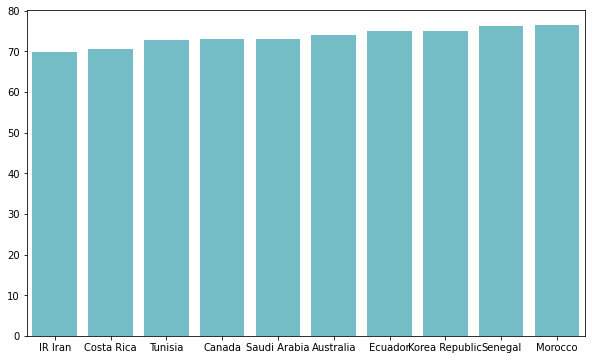

In [21]:
fig, axes = plt.subplots(1,1,  figsize=(10, 6))
ax = sns.barplot(data=mini_df.sort_values(by='midfield_score').head(10),x='Team',y='midfield_score',color = "#66C8D5")
ax.set(xlabel = '', ylabel = '')
plt.show()

In [22]:
mini_df[mini_df['midfield_score']==mini_df['midfield_score'].max()]['Team']

5    Spain
Name: Team, dtype: object

## Is there really such a thing as a home team advantage?

In [23]:
mini_df[mini_df['win_home']>mini_df['win_away']]['Team'].count()

27

In [24]:
mini_df[mini_df['win_home']<mini_df['win_away']]['Team'].count()

4

## Do teams with stronger offense players score more goals? And do teams with stronger goalkeepers receive fewer goals?

In [25]:
mini_df[['Team','goalkeeper_score','offence_score','total_goal']].sort_values(by=['offence_score'],ascending=False)

,Team,goalkeeper_score,offence_score,total_goal
3,Argentina,80.70,88.25,630
0,Brazil,86.28,86.55,437
5,Spain,88.78,85.87,761
2,France,86.86,85.70,700
8,Netherlands,83.23,85.47,762
4,England,83.25,85.09,713
6,Portugal,81.81,84.93,273
11,Uruguay,79.37,83.60,670
10,Germany,89.02,83.59,540
1,Belgium,82.41,81.71,452


In [26]:
from sklearn import preprocessing
normalized_total_goal = preprocessing.normalize([mini_df['total_goal'].values])
normalized_goalkeeper_score = preprocessing.normalize([mini_df['goalkeeper_score'].values])
normalized_offence_score = preprocessing.normalize([mini_df['offence_score'].values])

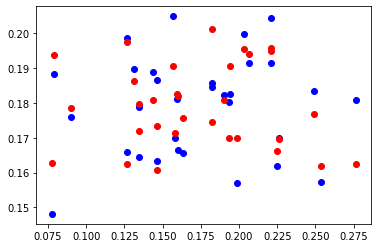

In [27]:
plt.scatter(normalized_total_goal,normalized_goalkeeper_score,color='blue')
plt.scatter(normalized_total_goal,normalized_offence_score,color='red');

# ML

In [28]:
df['home_team_goalkeeper_score'].fillna(np.round(df['home_team_goalkeeper_score'].mean(),2), inplace=True)
df['away_team_goalkeeper_score'].fillna(np.round(df['away_team_goalkeeper_score'].mean(),2), inplace=True)
df['home_team_mean_defense_score'].fillna(np.round(df['home_team_mean_defense_score'].mean(),2), inplace=True)
df['away_team_mean_defense_score'].fillna(np.round(df['away_team_mean_defense_score'].mean(),2), inplace=True)
df['home_team_mean_offense_score'].fillna(np.round(df['home_team_mean_offense_score'].mean(),2), inplace=True)
df['away_team_mean_offense_score'].fillna(np.round(df['away_team_mean_offense_score'].mean(),2), inplace=True)
df['home_team_mean_midfield_score'].fillna(np.round(df['home_team_mean_midfield_score'].mean(),2), inplace=True)
df['away_team_mean_midfield_score'].fillna(np.round(df['away_team_mean_midfield_score'].mean(),2), inplace=True)

In [29]:
df=df.rename(columns={'home_team_result':'result','home_team': 'team1','away_team': 'team2','home_team_fifa_rank': 'rank1','away_team_fifa_rank': 'rank2','home_team_total_fifa_points': 'point1','away_team_total_fifa_points': 'point2','home_team_score': 'score1','away_team_score': 'score2','home_team_goalkeeper_score':'goalkeeper1','away_team_goalkeeper_score':'goalkeeper2','home_team_mean_defense_score':'defense1','away_team_mean_defense_score':'defense2','home_team_mean_offense_score':'offense1','away_team_mean_offense_score':'offense2','home_team_mean_midfield_score':'midfield1','away_team_mean_midfield_score':'midfield2'})

In [30]:
final_df = pd.get_dummies(df)

In [31]:
final_df

,rank1,rank2,point1,point2,score1,score2,neutral_location,shoot_out,result,goalkeeper1,...,country_United Arab Emirates,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Wales,country_Yemen,country_Zambia,country_Zimbabwe
0,59,22,0,0,3,1,0,0,1,74.96,...,0,0,0,0,0,0,0,0,0,0
1,8,14,0,0,1,1,0,0,2,74.96,...,0,0,0,0,0,0,0,0,0,0
2,35,94,0,0,5,0,0,0,1,74.96,...,0,0,0,0,0,0,0,0,0,0
3,65,86,0,0,1,0,0,0,1,74.96,...,0,0,0,0,0,0,0,0,0,0
4,67,5,0,0,1,3,0,0,0,74.96,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,180,153,932,1040,2,1,0,0,1,65.00,...,0,0,0,0,0,0,0,0,0,0
23917,192,135,895,1105,0,2,0,0,0,74.96,...,0,0,0,0,0,0,0,0,0,0
23918,28,60,1526,1387,0,0,1,1,0,79.00,...,0,0,0,0,0,0,0,0,0,0
23919,23,35,1553,1499,0,3,0,0,0,73.00,...,0,0,0,0,0,0,0,0,0,0


In [32]:
y=final_df['result']
X=final_df.drop(columns=['result'])

In [33]:
X

,rank1,rank2,point1,point2,score1,score2,neutral_location,shoot_out,goalkeeper1,goalkeeper2,...,country_United Arab Emirates,country_Uruguay,country_Uzbekistan,country_Vanuatu,country_Venezuela,country_Vietnam,country_Wales,country_Yemen,country_Zambia,country_Zimbabwe
0,59,22,0,0,3,1,0,0,74.96,74.21,...,0,0,0,0,0,0,0,0,0,0
1,8,14,0,0,1,1,0,0,74.96,74.21,...,0,0,0,0,0,0,0,0,0,0
2,35,94,0,0,5,0,0,0,74.96,74.21,...,0,0,0,0,0,0,0,0,0,0
3,65,86,0,0,1,0,0,0,74.96,74.21,...,0,0,0,0,0,0,0,0,0,0
4,67,5,0,0,1,3,0,0,74.96,74.21,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,180,153,932,1040,2,1,0,0,65.00,74.21,...,0,0,0,0,0,0,0,0,0,0
23917,192,135,895,1105,0,2,0,0,74.96,65.00,...,0,0,0,0,0,0,0,0,0,0
23918,28,60,1526,1387,0,0,1,1,79.00,74.00,...,0,0,0,0,0,0,0,0,0,0
23919,23,35,1553,1499,0,3,0,0,73.00,74.21,...,0,0,0,0,0,0,0,0,0,0


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [42]:
model=MLPClassifier(hidden_layer_sizes=(60,),max_iter=110,alpha=1e-4,solver='sgd',random_state=1,verbose=True,learning_rate_init=.1)

In [43]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)

In [44]:
model.fit(X_train,y_train)

Iteration 1, loss = 65893.62231597
Iteration 2, loss = 81776.97640816
Iteration 3, loss = 81774.23779341
Iteration 4, loss = 81767.09139889
Iteration 5, loss = 81759.94521657
Iteration 6, loss = 81752.79846861
Iteration 7, loss = 81745.65373832
Iteration 8, loss = 81738.50896575
Iteration 9, loss = 81731.36440419
Iteration 10, loss = 81724.22090339
Iteration 11, loss = 81717.07778478
Iteration 12, loss = 81709.93582690
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPClassifier(hidden_layer_sizes=(60,), learning_rate_init=0.1, max_iter=110,
              random_state=1, solver='sgd', verbose=True)

In [45]:
y_pred=model.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [46]:
model.score(X_test,y_test)

0.49645300228021283

In [47]:
model.score(X_train,y_train)

0.4892993074187309

# keras in MLP